In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../../Data/UNILORIN.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nData Preview:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Shape of dataset: (10000, 9)

Data Preview:
                  Faculty                   Department  UTME_Score  \
0     Management Sciences                      Finance         226   
1  Environmental Sciences  Urban and Regional Planning         224   
2       Clinical Sciences         Medicine and Surgery         218   
3     Veterinary Medicine          Veterinary Medicine         322   
4     Veterinary Medicine          Veterinary Medicine         296   

   Post_UTME_Score  Aggregate_Score  Olevel_Valid  Sittings Admission_Status  \
0            27.08            69.33          True         1         admitted   
1             6.76            50.76          True         1         admitted   
2             7.56            49.61          True         2     not admitted   
3             8.82            65.07          True         2         admitted   
4             6.93            55.53          True         1         admitted   

        Olevel_Grades  
0  C6, C4, C4, A1, C5  
1  C5,


Admission Distribution:
Admission_Status
admitted        7611
not admitted    2389
Name: count, dtype: int64


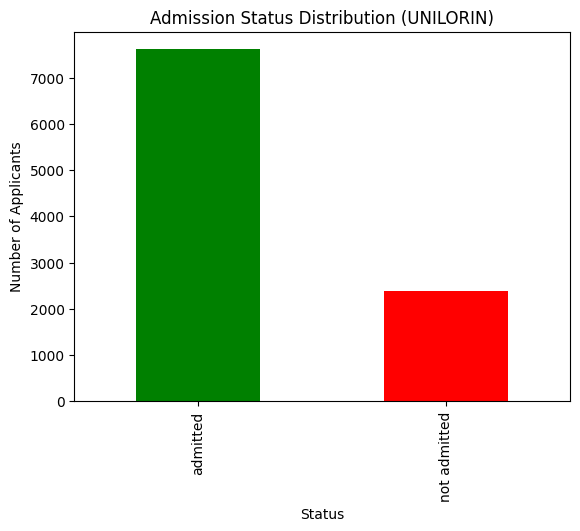

In [5]:
# Admission status count
admission_counts = df["Admission_Status"].value_counts()
print("\nAdmission Distribution:")
print(admission_counts)

admission_counts.plot(kind="bar", color=["green", "red"])
plt.title("Admission Status Distribution (UNILORIN)")
plt.xlabel("Status")
plt.ylabel("Number of Applicants")
plt.show()


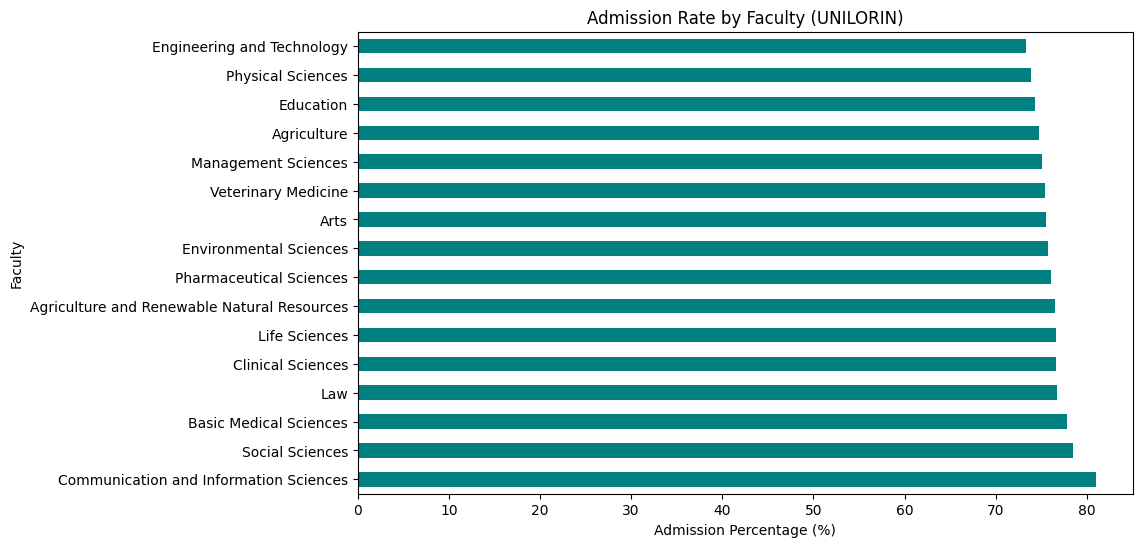

In [6]:
faculty_summary = df.groupby("Faculty")["Admission_Status"].value_counts(normalize=True).unstack().fillna(0) * 100
faculty_summary = faculty_summary.sort_values(by="admitted", ascending=False)

faculty_summary["admitted"].plot(kind="barh", figsize=(10, 6), color="teal")
plt.title("Admission Rate by Faculty (UNILORIN)")
plt.xlabel("Admission Percentage (%)")
plt.ylabel("Faculty")
plt.show()


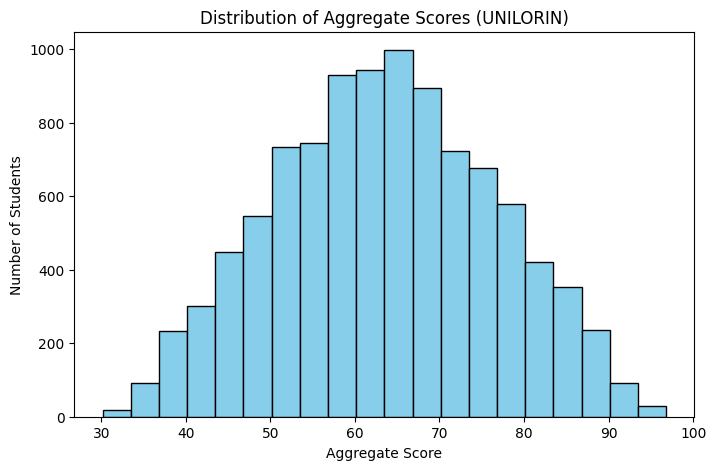

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df["Aggregate_Score"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Aggregate Scores (UNILORIN)")
plt.xlabel("Aggregate Score")
plt.ylabel("Number of Students")
plt.show()


In [10]:
summary = {
    "Total Applicants": len(df),
    "Admitted (%)": round((df["Admission_Status"].eq("admitted").mean()) * 100, 2),
    "Avg UTME": round(df["UTME_Score"].mean(), 2),
    "Avg Post-UTME": round(df["Post_UTME_Score"].mean(), 2),
    "Avg Aggregate": round(df["Aggregate_Score"].mean(), 2),
}
print("\n=== UNILORIN ADMISSION SUMMARY ===")
for k, v in summary.items():
    print(f"{k}: {v}")



=== UNILORIN ADMISSION SUMMARY ===
Total Applicants: 10000
Admitted (%): 76.11
Avg UTME: 269.72
Avg Post-UTME: 14.88
Avg Aggregate: 63.57
